Качанов Даниил Владимирович P3306

Лабораторная 3. Линейная регрессия

- Выбор датасетов:
    - Студенты с **четным** порядковым номером в группе должны использовать набор данных о [жилье в Калифорнии](https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=ru) Скачать [тут](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)
    - Студенты с **нечетным** порядковым номером в группе должны использовать [про обучение студентов](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)


Я на **восьмом** месте в группе, поэтому использую первый набор данных.

In [1]:
import pandas as pd
import numpy as np 
import random as rnd
import matplotlib.pyplot as plt
from typing import *


In [2]:
url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"

df = pd.read_csv(url)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

Количество

In [3]:
len(df)

17000

Средние значения

In [4]:
df.mean()

longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64

Стандартное отклонение

In [5]:
df.std()

longitude                  2.005166
latitude                   2.137340
housing_median_age        12.586937
total_rooms             2179.947071
total_bedrooms           421.499452
population              1147.852959
households               384.520841
median_income              1.908157
median_house_value    115983.764387
dtype: float64

Минимум и максимум

In [6]:
(df.min(), df.max())

(longitude              -124.3500
 latitude                 32.5400
 housing_median_age        1.0000
 total_rooms               2.0000
 total_bedrooms            1.0000
 population                3.0000
 households                1.0000
 median_income             0.4999
 median_house_value    14999.0000
 dtype: float64,
 longitude               -114.3100
 latitude                  41.9500
 housing_median_age        52.0000
 total_rooms            37937.0000
 total_bedrooms          6445.0000
 population             35682.0000
 households              6082.0000
 median_income             15.0001
 median_house_value    500001.0000
 dtype: float64)

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Визуализируем

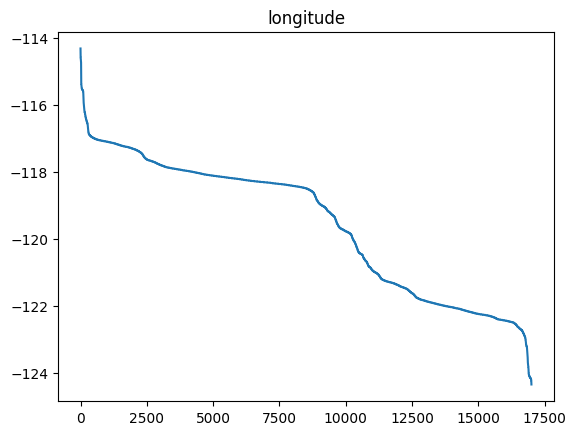

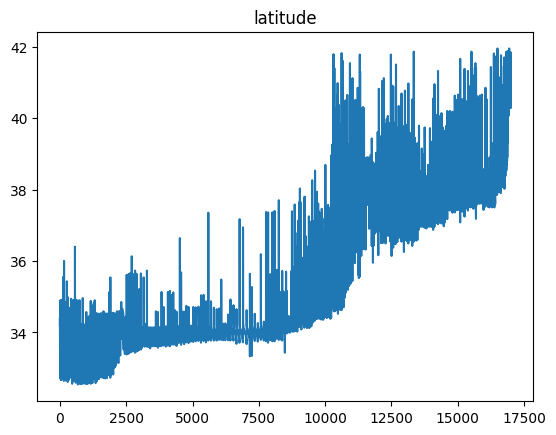

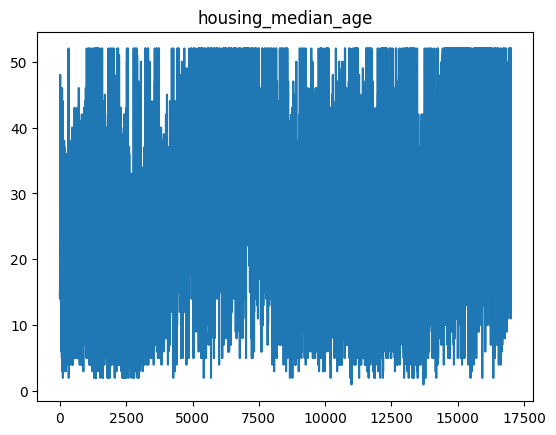

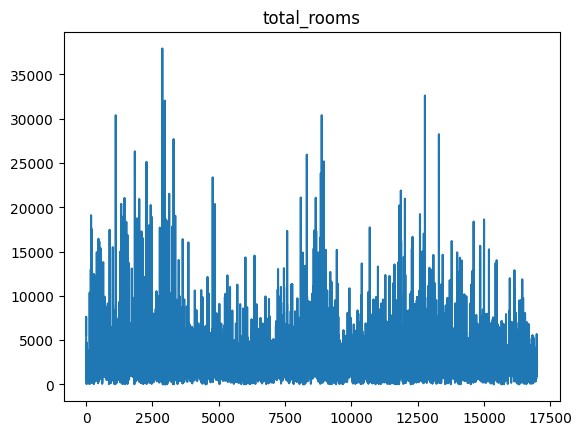

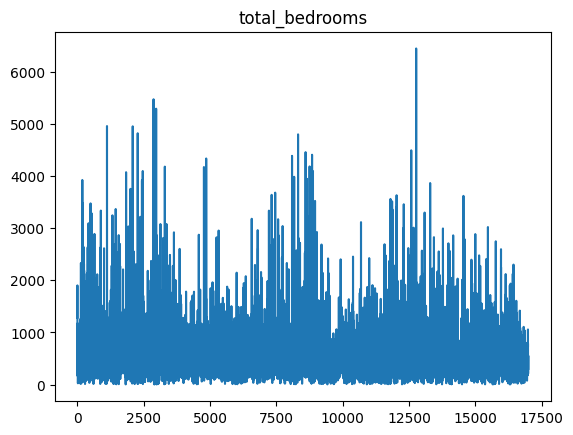

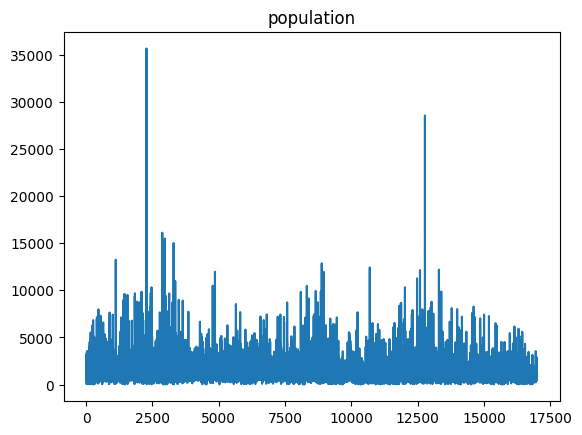

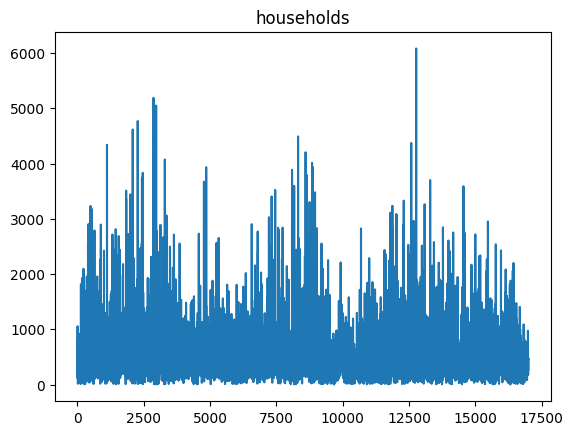

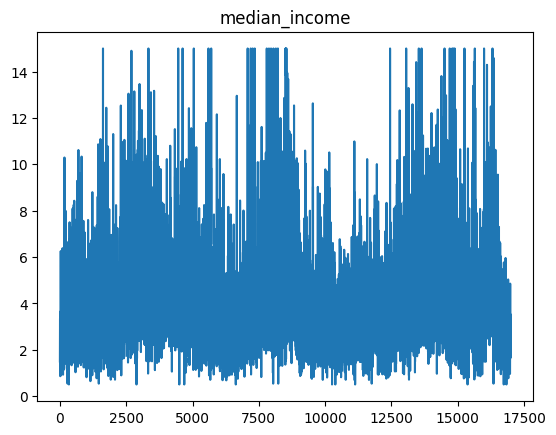

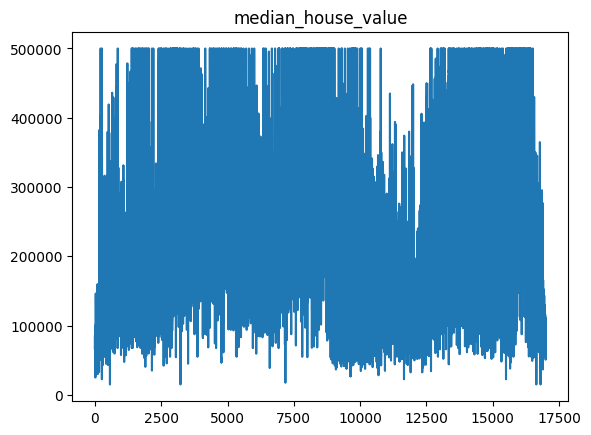

In [8]:
for f in df.columns:
    df[f].plot()
    plt.title(f)
    plt.show()


Проведи предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировку

In [9]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Отсутствующие значения отсутствуют.
Вот как можно было бы работать с ними:

In [10]:
df = df.fillna(df.mean())

Или просто избавиться от строк с пропусками

In [11]:
df = df.dropna()

Проведем Min-Max нормализацию.

In [12]:
df = (df - df.min())/(df.max() - df.min())
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,0.198764
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,0.131960
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,0.182682
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,0.145981


In [13]:
df.sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1037,0.722112,0.013815,0.411765,0.044497,0.083799,0.046694,0.081072,0.104923,0.197115
2546,0.668327,0.103082,0.274510,0.045894,0.039261,0.026346,0.044894,0.374753,0.558763
10640,0.384462,0.503719,0.196078,0.045314,0.058970,0.047787,0.061174,0.100247,0.086806
695,0.727092,0.053135,0.215686,0.048451,0.039261,0.016172,0.038316,0.432891,0.793813
14914,0.211155,0.561105,1.000000,0.080374,0.058970,0.028084,0.060516,0.530151,0.930101
16493,0.171315,0.604676,0.862745,0.059628,0.078057,0.030074,0.077454,0.173377,0.369279
4261,0.632470,0.130712,0.450980,0.034849,0.041279,0.019171,0.043249,0.202259,0.366598
16807,0.115538,0.708820,0.411765,0.040596,0.045003,0.022927,0.046703,0.213225,0.214022
8439,0.584661,0.182784,0.686275,0.046606,0.045779,0.026206,0.049827,0.362002,0.459794
3485,0.642430,0.161530,0.666667,0.034559,0.029950,0.016705,0.034205,0.482759,0.561237


In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


Как мы можем заметить, категориальные признаки в выборке отсутствуют

Разделите данные на обучающий и тестовый наборы данных.

Перемешаем выборку и разделим ее на наборы

In [15]:
# TODO
rnd_split = rnd.randrange(int(3/7 * len(df)), int(5/7 * len(df)))
rnd_split
X_train, y_train = df[:rnd_split].transpose()[:-1].transpose(), df[:rnd_split]["median_house_value"] 
# TO DO
X_test, y_test = df[rnd_split:].transpose()[:-1].transpose(), df[rnd_split:]["median_house_value"] 
X_train["Свободный член"] = np.ones(len(X_train))
X_train
X_test["Свободный член"] = np.ones(len(X_test))
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Свободный член
8256,0.587649,0.323061,0.294118,0.142191,0.183271,0.050422,0.132544,0.095309,1.0
8257,0.587649,0.201913,0.294118,0.353341,0.399286,0.196951,0.401085,0.288699,1.0
8258,0.587649,0.188098,0.156863,0.045789,0.055400,0.022899,0.052952,0.245217,1.0
8259,0.587649,0.188098,0.529412,0.040332,0.044382,0.027299,0.045058,0.274300,1.0
8260,0.587649,0.187035,0.666667,0.107631,0.142458,0.111690,0.148824,0.205604,1.0
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,1.0
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,1.0
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,1.0
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,1.0


In [16]:
df.clip()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,0.198764
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,0.131960
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,0.182682
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,0.145981


Инициализируем вектор весов

In [17]:
num_features = len(X_train.T)  # Количество признаков
W = [rnd.random() for _ in range(num_features)]

Предсказание нашей модели

In [18]:
def predict(w: list[int], x) -> float:
    return np.dot(w, x);

predict(W, X_train.iloc[0])

np.float64(1.5756608127325977)

Функция ошибки

In [19]:
def MSE(W, x, y):
    return np.mean([(predict(W, x.iloc[i]) - y.iloc[i])**2 for i in range(len(y))])

MSE(W, X_train, y_train)

np.float64(0.8949760571278379)

In [20]:
lr = 0.00001
for i in range(50):
    f = X_train.dot(W)
    err = f - y_train
    grad = 2 * X_train.T.dot(err)
    W -= lr * grad
    print(MSE(W, X_train, y_train))

0.46467579578014473
0.25432043349900074
0.15141522033277321
0.10100386712725662
0.07623893785303328
0.06400481394574636
0.05789418394149193
0.05477689820576157
0.05312377607610878
0.0521877473498923
0.051603821185035294
0.0511936617600669
0.05087011901035811
0.05059058970265696
0.05033423324554646
0.05009084108350832
0.049855399132956175
0.04962543139948011
0.04939970226580072
0.04917758252155248
0.04895873964626154
0.048742986497560856
0.04853020738412489
0.04832032194294734
0.04811326748504124
0.04790899036352005
0.04770744174945037
0.047508575561131666
0.047312347445502
0.047118714273656645
0.04692763388764571
0.04673906497014819
0.046552966974292634
0.046369300082977474
0.04618802518271707
0.0460091038446963
0.04583249830945719
0.04565817147346831
0.04548608687672041
0.04531620869092796
0.045148501708129514
0.0449829313295837
0.04481946355490864
0.04465806497143768
0.04449870274377632
0.04434134460355115
0.04418595883934487
0.04403251428681256
0.043880980318975533
0.043731326836689

In [21]:
MSE(W, X_test, y_test)

np.float64(0.0663951850776724)

In [22]:
W

longitude             0.355883
latitude             -0.057910
housing_median_age    0.003268
total_rooms           0.540730
total_bedrooms        0.545899
population           -0.032596
households            0.260128
median_income         0.533899
Свободный член       -0.048348
dtype: float64